# Topological Kuramoto model (Simplicial Kuramoto)

Ginestra Bianconi ginestra.bianconi@gmail.com
Sanjukta Krishnagopal s.krishnagopal@ucl.ac.uk

February 2023

In [2]:
import numpy as np
import networkx as nx
from matplotlib.pyplot import *
import scipy.linalg as linalg
import scipy
import random
import matplotlib as plt
import math

from scipy.integrate import odeint
import scipy.integrate as it
from scipy.sparse import coo_matrix
import json
from scipy.cluster.hierarchy import dendrogram

import itertools
import copy
from functools import reduce

from scipy.sparse.linalg import eigs
from collections import Counter
from scipy.linalg import null_space
from scipy.sparse import csr_matrix
from scipy.sparse import csc_matrix

from collections import defaultdict

import xgi

%matplotlib inline
%run Topological_Kuramoto

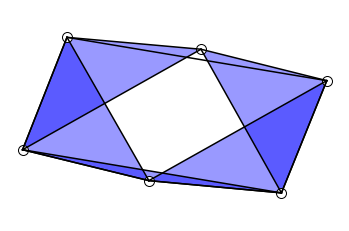

In [3]:
#Conside and example of 2-dimensional simplicial complex
#Construct the boundary matrices B1 and B2
#Visualize the simplicial complex


N = 6 #number of nodes
edge_list = [[1,2],[2,3],[1, 3],[1,4],[3,4],[1,5],[2,5],[2,6],[3,6],[5,6],[4,5],[4,6]]
#t_list = [[3,4,6],[2,3,6],[2,5,6],[1,4,5],[4,5,6],[1,2,5]]
t_list = [[3,4,6],[2,3,6],[1,4,5],[4,5,6],[1,2,5]]
N_1=len(edge_list) #number of edges
N_2=len(t_list) #number of 2-simplices

SC = xgi.SimplicialComplex()
SC.add_nodes_from(range(3))


SC1 = xgi.SimplicialComplex(edge_list)
SC1.add_simplices_from(t_list)
pos = xgi.pairwise_spring_layout(SC1)
xgi.draw(SC1, pos, edge_fc='blue')

G = nx.Graph()
G.add_nodes_from(range(1, N))
G.add_edges_from(edge_list)
#create boundary matrix B1
B1 = nx.incidence_matrix(
    G, nodelist=None, edgelist=edge_list, oriented=True, weight=None).A
#create boudnary matrix B2
t2 = np.array(t_list)
B2 = get_B2(edge_list, t2)
N_0, N_1 = B1.shape
B1T=B1.T
B2T=B2.T


B2=np.array([[1,1,-1,0,0,0]]).T
B2=np.array([[0,0,0,0,0,0]]).T
B2=np.array([[0,0,0,0,0]]).T
B2.shape
#B2=np.array([[0,0,0]]).T
x

In [4]:
#Get the Hodge Laplacians, betti number beta_1 and the harmonic eigenvector(s)
L0 = B1@B1.T
K = diag(diag(L0))
A = K-L0

B1T = B1.T
L1 = B1T@B1+B2@B2.T
L2=B2.T@B2
G1=diag(diag(L1)**(-1))
u,s, vh = np.linalg.svd(L1)
idx=1.*np.isclose(s,0)
i=np.argwhere(idx==1)
i_harm=i[:,0];
betti1=i.shape[0]
betti1, i_harm[0], i_harm[1], i[:,0]

(2, 10, 11, array([10, 11]))

In [21]:
# Topological Kuramoto - oscillators on edges
R = []
Rplus = []
Rminus = []

strength_range = arange(0., 5, 0.01)
B2T = B2.T
n_simplexes = len(edge_list)

natfreqs=np.random.normal(loc=2,size=n_simplexes)
init_angles =2 * np.pi * np.random.random(size=n_simplexes)
for coupling in strength_range:
    model = Topological_Kuramoto(coupling=coupling, dt=0.01, T=50, explosive=True,
                     n_simplexes=n_simplexes, natfreqs=natfreqs, init_angles=init_angles)
    act_mat = model.run(B1,B_2=B2)
    for t in range(1):  # range(shape(act_mat)[1]):
        t = -1
        R.append(abs(sum([(np.e ** (1j * act_mat[:, t]))])/len(act_mat[:, t])))
        Rplus.append(
            abs(sum([(np.e ** (1j * B2T@act_mat[:, t]))])/(B2.shape[1])))
        Rminus.append(
            abs(sum([(np.e ** (1j * B1@act_mat[:, t]))])/len(B1[0])))
        init_angles =act_mat[:, t]

(-0.01, 1.0)

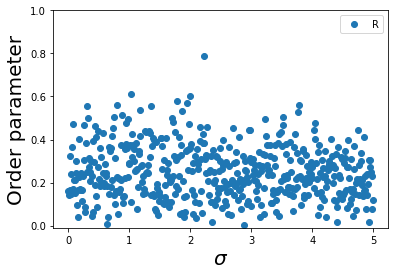

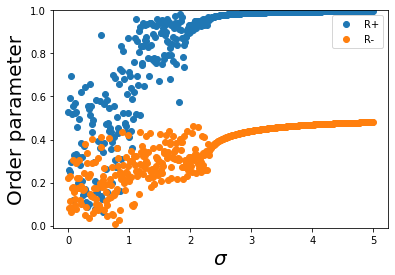

In [22]:
figure()
plot(strength_range, R, 'o', label='R')
ylabel('Order parameter', fontsize=20)
legend()
xlabel(r'$\sigma$', fontsize=20)
ylim((-0.01, 1.0))
figure()
plot(strength_range, Rplus, 'o', label='R+')
plot(strength_range, Rminus, 'o', label='R-')
ylabel('Order parameter', fontsize=20)
legend()
xlabel(r'$\sigma$', fontsize=20)
ylim((-0.01, 1.0))


In [24]:
R = []
Rplus = []
Rminus = []

strength_range = arange(0.1, 3, 0.05)
B1T = B1.T
n_simplexes = len(edge_list)
natfreqs = np.random.normal(loc=2,size=n_simplexes)
coupling =4.0
model = Topological_Kuramoto(coupling=coupling, dt=0.01, T=50, explosive=True,
            n_simplexes=n_simplexes, natfreqs=natfreqs, init_angles=None)
act_mat = model.run(B=B1,B_2=B2)


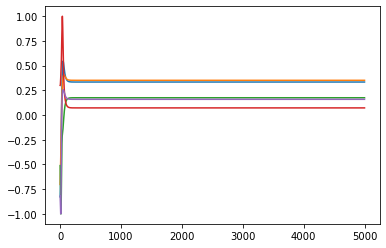

In [25]:
phi_plus = B2.T@act_mat
for phi in phi_plus:
    plot(sin(phi))

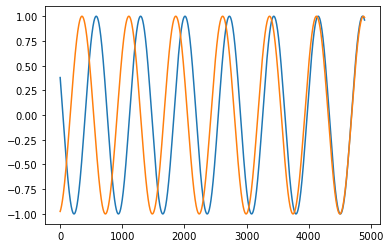

In [26]:

plot(sin(vh[i_harm[0],:]@act_mat[:,100:5000]))
plot(sin(vh[i_harm[1],:]@act_mat[:,100:5000]))


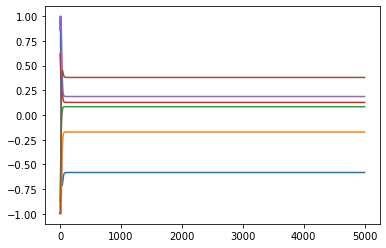

In [27]:
phi_minus = B1@act_mat
for phi in phi_minus:
    plot(sin(phi))

# Dirac Synchronization


In [5]:
L0 = B1@B1.T
K = (diag(L0)+1.*(diag(L0)==0))
G=diag(K**(-1))

D= np.block([[np.zeros((N_0,N_0)),G@B1],
             [B1T/2,np.zeros((N_1,N_1))]])
L_S=D@D
gamma=np.block([[np.eye(N_0,dtype=float),np.zeros((N_0,N_1))],
             [np.zeros((N_1,N_0)),-np.eye(N_1,dtype=float)]])
u_D,s_D, vh_D = np.linalg.svd(D)
idx=1.*np.isclose(s_D,0)
i=np.argwhere(idx==1)
i_harm_D=i[:,0]
#s_D,s, i_harm_D,L_S.shape, D.shape


In [6]:
# Topological  Dirac - oscillators on nodes and edges
Ralpha = []
Rbeta = []
sigma = []

N_2 = 0
strength_range = arange(0.1, 10.5, 0.03)
z = 1
n_simplexes = N_0+N_1+N_2


#x = np.random.normal(loc=0, size=n_simplexes)
#x[i_harm_D] = 0
#natfreqs = 2*(u_D[:,i_harm_D[6]]+u_D[:,i_harm_D[1]])+u_D@x
#Gaussian intrisic frequencies
natfreqs = np.random.normal(loc=0,size=n_simplexes)
init_angles = 2*np.pi*np.random.random(size=n_simplexes)
for coupling in strength_range:
    model = Topological_Dirac(coupling=coupling, dt=0.01, T=400,
                              n_simplexes=n_simplexes, natfreqs=natfreqs, init_angles=init_angles)
    act_mat = model.run(D, L_S, gamma,z)
    for t in range(1):  
        t = -1
        alpha = act_mat[:, t]+z*gamma@D@act_mat[:, t]
        Ralpha.append(
            abs(sum([(np.e ** (1j * alpha[0:N_0]))])/len(act_mat[0:N_0, t])))
        beta = D@act_mat[:, t]-z*gamma@L_S@act_mat[:, t]
        Rbeta.append(
            abs(sum([(np.e ** (1j * beta[N_0:N_0+N_1]))])/len(act_mat[N_0:N_0+N_1, t])))
        sigma.append(coupling)
        init_angles = act_mat[:, t]


<Figure size 432x288 with 0 Axes>

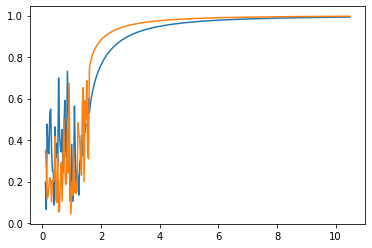

<Figure size 432x288 with 0 Axes>

In [7]:
figure()
plot(sigma,Ralpha)
plot(sigma,Rbeta)
figure()

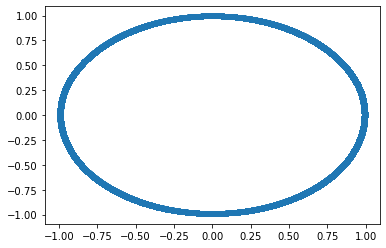

In [8]:
Xalpha = []
time = []
for t in  range(shape(act_mat)[1]):
    t1 = -t
    alpha = (act_mat[:, t1]+z*gamma@D@act_mat[:, t1])
    Xalpha.append(
        (sum([(np.e ** (1j * alpha[0:N_0]))])/len(act_mat[0:N_0, t1])))
    time.append(t1)

plot(real(Xalpha),imag(Xalpha),'*')

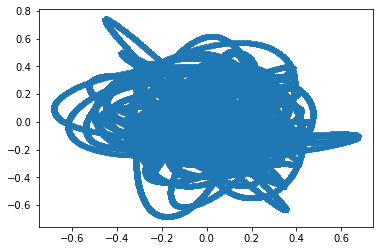

In [9]:
Xalpha = []
time = []
for t in  range(shape(act_mat)[1]):
    t1 = -t
    alpha = (act_mat[:, t1]+z*gamma@D@act_mat[:, t1])
    Xalpha.append(
        (sum([(np.e ** (1j * alpha[N_0+1:N_0+N_1]))])/len(act_mat[N_0+1:N_0+N_1, t1])))
    time.append(t1)

plot(real(Xalpha),imag(Xalpha),'*')